In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
import collections
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Практическое задание 5
## Вариант 4
## Задание 1 

*Максимальная оценка задания: **1** балла*

Дан набор точек **D**:

|      | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
|**x**|-15.7|-21|-20.8|-13.6|-23.9|-8.5|-22.3|-19.6|-16.6|-15.9|
|**y**|-52.3|-31.1|-33.3|-52.1|-32|-51|-32.8|-31.8|-49.7|-51.6|

Количество кластеров k = **2**

Начальные средние значения (центры кластеров) M = **[(-23, -35), (-15, -58)]**

Порог сходимости ε = **0.01**

1.1 *Самостоятельно* реализуйте алгоритм **KMeans** для двумерных данных. Вычислите кластеры и их центры. 

Оформите этот пункт в виде функции. Функция должна возвращать найденные кластеры и новые центры кластеров. Каждый кластер должен содержать индексы точек, которые принадлежат этому кластеру

1.2 Постройте диаграмму рассеяния, на которой будут отображены все точки, их принадлежность кластеру, центры кластеров. 

Оформите этот пункт в виде функции. Принадлежность кластеру отобразить цветом точки. Все точки подписать. Точки центров кластеров выделить

1.3 Воспользуйтесь алгоритмом **KMeans** из библиотеки **sklearn** и выведите результат его работы. Сравните результаты собственной и библиотечной реализации

1.4 К исходным данным добавьте точку **(-30, 19)** и повторно вычислите кластеры и их центры. Также постройте диаграмму рассеяния

1.1 и 1.2

Кластеры 0 и 1, принадлежность точек кластерам:
[1. 0. 0. 1. 0. 1. 0. 0. 1. 1.]
Центр кластеров для 0 и 1 в формате [х y]:
[[-21.52 -32.2 ]
 [-14.06 -51.34]]


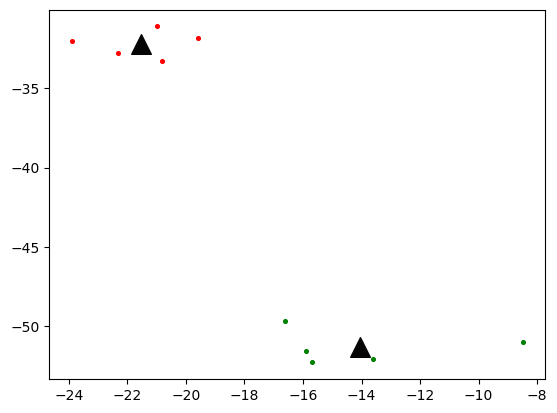

In [2]:
print("1.1 и 1.2\n")
# Функция для расчета евклидова расстояние
# Принимает параметры:
# a - первая точка
# b - вторая точка
# return:
# float - расстояние
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


# Функция для расчета евклидова расстояние между 2 центрами кластеров
# Принимает параметры:
# a - первая точка
# b - вторая точка
# return:
# bool 
def dist_err(a, b, tol, ax=1):
    if (np.linalg.norm(a - b, axis=ax)<tol):
        return 0
    else: 
        return 1
    
    
# Функция для алгоритма K_means
# Принимает параметры:
# D - np.array для двух векторов
# C - начальный центр
# k - количество кластеров
# tolerance - порог сходимости
# return:
# list() для clusters - принадлежность к кластерам
# np.array(2*2) - центры кластеров
def K_means(D,C,k,tolerance):
    C_old = np.zeros(C.shape)
    clusters = np.zeros(len(D))
    #Ошибка работает с tolerance
    error = dist_err(C, C_old,tolerance, None)
    while error != 0:
        for i in range(len(D)):
            distances = dist(D[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        C_old = deepcopy(C)
        # Поиск новых центров центроидов
        for i in range(k):
            temp_for_C=[]
            points = [D[j] for j in range(len(D)) if clusters[j] == i]
            C[i] = np.mean(points, dtype=np.float64,axis=0)
        error = dist_err(C, C_old,tolerance, None)
    colors = ['r', 'g', 'b', 'y', 'c']# цвета для кластеров
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([D[j] for j in range(len(D)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='^', s=200, c='#050505')
    return clusters,C
    


x = [-15.7,-21,-20.8,-13.6,-23.9,-8.5,-22.3,-19.6,-16.6,-15.9]
y = [-52.3,-31.1,-33.3,-52.1,-32,-51,-32.8,-31.8,-49.7,-51.6]
D = np.array(list(zip(x, y)))
# print(X)
# Количество кластеров
k = 2
tolerance = 0.01
C_x = [-23., -35.]
C_y = [-15., -58.]
C = np.array(list(zip(C_x, C_y)))

clusters,C_dop=K_means(D,C,k,tolerance)
print("Кластеры 0 и 1, принадлежность точек кластерам:")
print(clusters)
print("Центр кластеров для 0 и 1 в формате [х y]:")
print(C_dop)

    
    

In [3]:
print("1.3\n")
cluster_centers = np.array([[-23, -35], [-15, -58]])
kmeans = KMeans(n_clusters=2, init=cluster_centers, n_init=1,tol=0.01).fit(D)
print("Кластеры 0 и 1, принадлежность точек кластерам:")
print(kmeans.labels_)
print("Центр кластеров для 0 и 1 в формате [х y]:")
print(kmeans.cluster_centers_)
print("\nРезультаты собственной и библиотечной реализации совпадают")

1.3

Кластеры 0 и 1, принадлежность точек кластерам:
[1 0 0 1 0 1 0 0 1 1]
Центр кластеров для 0 и 1 в формате [х y]:
[[-21.52 -32.2 ]
 [-14.06 -51.34]]

Результаты собственной и библиотечной реализации совпадают


1.4

Кластеры 0 и 1, принадлежность точек кластерам:
[1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
Центр кластеров для 0 и 1 в формате [х y]:
[[-22.93333333 -23.66666667]
 [-14.06       -51.34      ]]


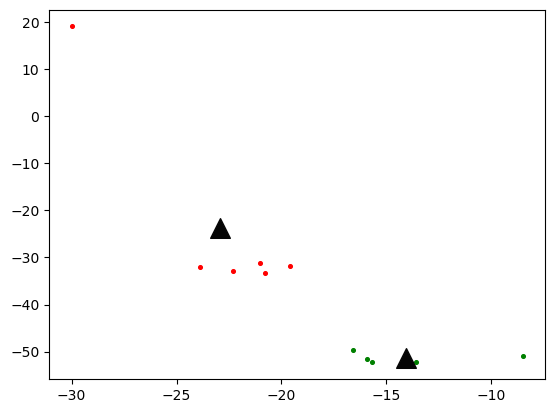

In [4]:
print("1.4\n")
x = [-15.7,-21,-20.8,-13.6,-23.9,-8.5,-22.3,-19.6,-16.6,-15.9]
y = [-52.3,-31.1,-33.3,-52.1,-32,-51,-32.8,-31.8,-49.7,-51.6]

x.append(-30)
y.append(19)

D = np.array(list(zip(x, y)))
clusters, C_dop=K_means(D,C,k,tolerance)
print("Кластеры 0 и 1, принадлежность точек кластерам:")
print(clusters)
print("Центр кластеров для 0 и 1 в формате [х y]:")
print(C_dop)

## Задание 2

*Максимальная оценка задания: **1** балл*

Дан набор значений **X** и вероятностей их принадлежности к кластерам *C<sub>1</sub>* и *C<sub>2</sub>*:

| *x*  | *P(C<sub>1</sub>\|x)* | *P(C<sub>2</sub>\|x)* |
| ---- | --------------------- | --------------------- |
|18.8|0.3|0.7|
|16.6|0.6|0.4|
|9.5|0.9|0.1|
|13.6|0.8|0.2|
|17.1|0.5|0.5|
|23.2|0|1|
|23|0|1|
|7.7|0.9|0.1|
|18.5|0.3|0.7|
|19.8|0.2|0.8|

2.1 Найдите оценку максимального правдоподобия для средних μ<sub>1</sub> и μ<sub>2</sub>

2.2 Пусть μ<sub>1</sub> = **13**, μ<sub>2</sub> = **19.1** и σ<sub>1</sub> = **3.2**, σ<sub>2</sub> = **4.3**. Априорные вероятности каждого кластера P(*C<sub>1</sub>*) = **0.6**, P(*C<sub>2</sub>*) = **0.4**.

Найдите вероятности принадлежности точки x = **14.8** к кластерам *C<sub>1</sub>* и *C<sub>2</sub>*


In [5]:
print("2.1\n")


x = [18.8, 16.6, 9.5, 13.6, 17.1, 23.2, 23, 7.7, 18.5, 19.8]
pc_fir_x = [0.3, 0.6, 0.9, 0.8, 0.5, 0, 0, 0.9, 0.3, 0.2]
pc_sec_x = [0.7, 0.4, 0.1, 0.2, 0.5, 1, 1, 0.1, 0.7, 0.8]
up1=0
up2=0
for i in range(0,len(x)):
    up1 += x[i]*pc_fir_x[i]
    up2 += x[i]*pc_sec_x[i]
u1 = up1/sum(pc_fir_x)
u2 = up2/sum(pc_sec_x)
print("Оценка максимального правдоподобия")
print(u1,u2)

2.1

Оценка максимального правдоподобия
13.337777777777777 19.596363636363638


In [6]:
print("2.2\n")
u1 = 13
u2 = 19.1
sk1 = 3.2
sk2 = 4.3
pc = [0.6, 0.4]

x = 14.8
f=[]
f.append(stats.norm.pdf(x, u1, sk1))
f.append(stats.norm.pdf(x, u2, sk2))
p_c_x=[0,0]
full_P=f[0]*pc[0]+f[1]*pc[1]
for i in range(2):
    p_c_x[i]=(f[i]*pc[i])/full_P
print("Вероятности принадлежности точки x к кластерам C1 и C2:")
print(p_c_x)

2.2

Вероятности принадлежности точки x к кластерам C1 и C2:
[0.7393756848196085, 0.26062431518039153]


## Задание 3

*Максимальная оценка задания: **2** балла*

Даны категориальные данные размерности 5:

|           | *X<sub>1</sub>* | *X<sub>2</sub>* | *X<sub>3</sub>* | *X<sub>4</sub>* | *X<sub>5</sub>* |
| --------------- | -------- | --------------- | --------------- | --------------- | --------------- |
|**x<sub>0</sub>**|0|1|1|1|1|
|**x<sub>1</sub>**|1|0|1|0|0|
|**x<sub>2</sub>**|1|1|1|0|0|
|**x<sub>3</sub>**|1|1|1|1|0|
|**x<sub>4</sub>**|1|1|1|1|1|
|**x<sub>5</sub>**|1|1|0|0|1|

Близость двух наблюдений определяется через количество совпадений и несовпадений значений признаков. Допустим, что n<sub>11</sub> это количество признаков, одновременной равных 1 для наблюдений x<sub>i</sub> и x<sub>j</sub>, и n<sub>10</sub> это количество признаков, равных 1 для наблюдения x<sub>i</sub> и в то же время равных 0 для наблюдения x<sub>j</sub>. По аналогии определяются n<sub>01</sub> и n<sub>00</sub>:

| x<sub>i</sub> \ x<sub>j</sub> |       1        |       0        |
| :---------------------------: | :------------: | :------------: |
|               1               | n<sub>11</sub> | n<sub>10</sub> |
|               0               | n<sub>01</sub> | n<sub>00</sub> |

Даны следующие метрики:

- Коэффициент простого совпадения
  $$
  SMC({\bf x}_i,{\bf x}_j)= \frac{n_{11}+n_{00}}{n_{11}+n_{10}+n_{01}+n_{00}}
  $$
  
- Коэффициент Жаккара
  $$
  JC({\bf x}_i,{\bf x}_j)= \frac{n_{11}}{n_{11}+n_{10}+n_{01}}
  $$

- Коэффициент Рассела и Рао
  $$
  RC({\bf x}_i,{\bf x}_j)= \frac{n_{11}}{n_{11}+n_{10}+n_{01}+n_{00}}
  $$

*Самостоятельно* реализуйте алгоритм **AgglomerativeClustering** (агломеративная иерархическая кластеризация). В качестве результата выведите список кластеров, возникающих на каждом шаге работы алгоритма.

Выполните иерархическую кластеризации и постройте дендрограммы по результатам кластеризации для следующих параметров алгоритма:

3.1 Метод одиночной связи с метрикой **RC**

3.2 Метод полной связи с метрикой **SMC**

3.3 Метод средней связи с метрикой **JC**

На дендрограммах подпишите точки (по оси x) и уровни (по оси y)


Основной код:
3.1 Метод одиночной связи с метрикой RC

Объединяем кластеры:  0 4
Вывод кластеров [[0, 4], [1], [2], [3], [5]]

Объединяем кластеры:  0 3
Вывод кластеров [[0, 3, 4], [1], [2], [5]]

Объединяем кластеры:  0 2
Вывод кластеров [[0, 2, 3, 4], [1], [5]]

Объединяем кластеры:  0 5
Вывод кластеров [[0, 2, 3, 4, 5], [1]]

Объединяем кластеры:  0 1
Вывод кластеров [[0, 1, 2, 3, 4, 5]]



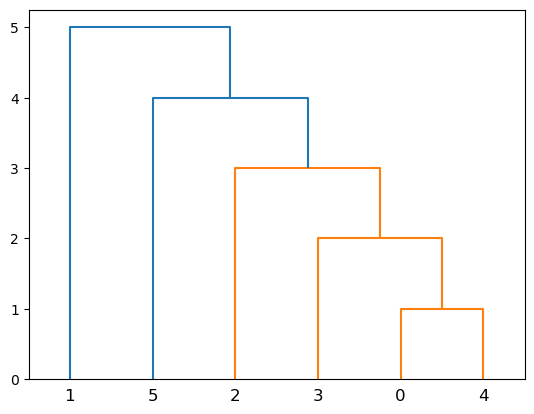

In [36]:
print("Основной код:")
arr=[[0.,1.,1.,1.,1.],[1.,0.,1.,0.,0.],[1.,1.,1.,0.,0.],[1.,1.,1.,1.,0.],[1.,1.,1.,1.,1.],[1.,1.,0.,0.,1.]]

# single_connect = get_min
# full_connect = get_max
# mean_connect = get_mean


############unit_test###########        
def test(gen_build,compare_build):
     matrix_mini(gen_build,compare_build)
################################


# Функция для рассчета матрицы 2 наблюдений 2*2
# Принимает параметры:
# gen_build - i элемент пары
# compare_build - j элемент пары
# return: 
# np.array(2*2) - матрица наблюдений для пары i,j
def matrix_mini(gen_build,compare_build):
    mat = np.zeros((2,2))
    for i in range(0,len(gen_build)):
        mat[int(gen_build[i]),int(compare_build[i])]+=1
    return mat


# Функция дистрибьютор производит расчет матрицы расстояний и вызывает функцию connect(метод связи)
# Принимает параметры:
# clusters - dict с кластерами
# func_metr - выбранная метрика SMC, JC или RC
# get_func - основа методов single, complete, average: get_min, get_max, get_mean
def distributor(clusters,func_metr,get_func):
    for k,v in clusters.items():
        for index in v:
            gen_build = arr[index]
            for deep in range(0,6):
                if (deep!=index and v[index][deep] is not None):
                    if deep>index:
                        compare_build = arr[deep]
                        mat = matrix_mini(gen_build,compare_build)
                        dist = func_metr(mat)
                        v[index][deep] = dist
                    else: v[index][deep] = None
    connect(clusters,get_func)
    
    
# Функция рассчета метрики SMC
# Принимает параметр:
# mat - матрица матрицы 2 наблюдений 2*2
# return:
# int - расстояние между парой i,j с метрикой SMC
def SMC(mat): 
    distance = 1-((mat[1][1]+mat[0][0])/(mat[1][1]+mat[0][1]+mat[1][0]+mat[0][0]))
    return distance


# Функция рассчета метрики RC
# Принимает параметр:
# mat - матрица матрицы 2 наблюдений 2*2
# return:
# int - расстояние между парой i,j с метрикой RC
def RC(mat): #Метрика RC
    distance = 1-((mat[1][1])/(mat[1][1]+mat[0][1]+mat[1][0]+mat[0][0]))
    return distance


# Функция рассчета метрики JC
# Принимает параметр:
# mat - матрица матрицы 2 наблюдений 2*2
# return:
# int - расстояние между парой i,j с метрикой JC
def JC(mat): #Метрика JC
    distance = 1-((mat[1][1])/(mat[1][1]+mat[0][1]+mat[1][0]))
    return distance


# Функция поиска кластера по точке
# Принимает параметры:
# clusters - dict с кластерами
# number - номер точки для поиска
# return:
# char - номер кластера, являющийся ключом dict кластеров
def find_cluster(clusters,number):
    for k,v in clusters.items():
        for index in v:
            if index == number:
                return k
            
            
# Функция получения минимального расстояния для пары кластеров
# Принимает параметры:
# dist_in - массив расстояний
# ред. sizeCi,sizeCj
# return:
# int - минимальное значение
# int - индекс минимального значения
def get_min(dist_in,sizeCi,sizeCj):
    min_val, min_ind = min((value, j) for j, value in enumerate(dist_in) if value is not None)
    return min_val, min_ind


# Функция получения максимального расстояния для пары кластеров
# Принимает параметры:
# dist_in - массив расстояний
# ред. sizeCi,sizeCj
# return:
# int - максимальное значение
# int - индекс максимального значения
def get_max(dist_in,sizeCi,sizeCj):
    max_val, max_ind = max((value, j) for j, value in enumerate(dist_in) if value is not None)
    return max_val, max_ind


# Функция получения среднего расстояния для пары кластеров
# Принимает параметры:
# dist_in - массив расстояний
# sizeCi - размер кластера i
# sizeCj - размер кластера j
# return:
# int - среднее значение
# None - индекс среднего значения (не возвращается)
def get_mean(dist_in,sizeCi,sizeCj):
    mean_val =  sum(dist_in)/(sizeCi*sizeCj)
    return mean_val, None


# Функция для обработки метода: single, complete, average
# Принимает параметры:
# clusters - dict с кластерами
# get_func - функция метрики: get_min, get_max, get_mean
def connect(clusters,get_func):
    for i in range(5): # подсчет размера своего кластера
        count = 0
        dist = []
        aff_gen = []
        keys = []
        for k,v in clusters.items():
            dist_in = []
            aff = []
            lit = []
            sizeCj = 0
            sizeCi = 0
            for less in v.keys(): #v это словарь вершин кластера (со всеми связями), v.keys() - это все вершины 
                lit.append(less) #тут находим все вершины для текущего кластера
            poinst_check=[]
            for t in range(0,6): # для всех расстояний
                if v[lit[0]][t] is not None: #смотрим на первую вершину кластера, так как связь 6 к 6, то смысла нет
                    little_arr = []#смотреть больше, так как расстояние None будет только для точек одного кластера
                    C_j=find_cluster(clusters,t)#находим кластер для точки
                    for k_j in clusters[C_j].keys():# записываю вершины найденных кластеров
                        little_arr.append(k_j)
                    poinst_check.append(little_arr) 
            uniq_poinst_check=[]
            [uniq_poinst_check.append(x) for x in poinst_check if x not in uniq_poinst_check]
            lenth_mass = 0
            while(lenth_mass<len(uniq_poinst_check)):
                for index in v: # для каждой вершины
                    for t in uniq_poinst_check[lenth_mass]: #ее отображение в кластере j
                        if v[index][t] is None:
                            key = find_cluster(clusters,t)
                            dist_in.append(clusters[key][t][index])
                        else:
                            dist_in.append(v[index][t])
                        aff.append(t)
                sizeCi = len(v)
                sizeCj = len(uniq_poinst_check[lenth_mass])
                
                ############### Вариативность параметра get_func в зависимости от типа связи
                val, ind = get_func(dist_in,sizeCi,sizeCj)
                ######################
                if ind is None:
                    aff_gen.append(t)
                else:
                    aff_gen.append(aff[ind])
                keys.append(int(k))
                dist.append(val)
                lenth_mass += 1
                aff = []
                dist_in = []
            count+=1
        min_val_gen, min_ind_gen = get_min(dist,sizeCi,sizeCj)
        f_clust = int(find_cluster(clusters,keys[min_ind_gen]))#объединяем всегда в левый кластер
        s_clust = int(find_cluster(clusters,aff_gen[min_ind_gen]))
        if f_clust > s_clust:
            f_clust,s_clust = s_clust,f_clust
        # for k,v in clusters.items():
        #     print(k,v)
        clusters=merge_clusters(clusters,f_clust, s_clust)

        
        
# Функция для смерживания кластеров
# Принимает параметры:
# clusters - dict с кластерами
# f_clust - номер кластера i
# s_clus -  номер кластера j
# return:
# dict{} - обновленный словарь кластеров, с новой матрицей расстояний 
def merge_clusters(clusters,f_clust,s_clust):
    #Получаем номер первого кластера куда копируем все точки второго кластера
    print("Объединяем кластеры: ",f_clust,s_clust)
    simple_clusters=[]
    
    for i in clusters[str(s_clust)]:
        clusters[str(f_clust)][i] = clusters[str(s_clust)][i] # копируем в левый кластер
    clusters[str(f_clust)]=dict(sorted(clusters[str(f_clust)].items())) # сортируем словарь

    del clusters[str(s_clust)]#удаляем старый кластер
    for k,v in clusters.items():
        dop_array = []
        for t in v.keys():
            dop_array.append(t)    
        simple_clusters.append(dop_array)

    print("Вывод кластеров",simple_clusters)
    kol = []
    for k,v in clusters[str(f_clust)].items():
        kol.append(k)
        
    for k,v in clusters[str(f_clust)].items():
        for index, run in enumerate(clusters[str(f_clust)][k]):
            if index in kol:
                if run is not None:
                    clusters[str(f_clust)][k][index] = None
    print()
    return clusters
        

if __name__ == '__main__':
    clusters = {'0':{0:[None,0,0,0,0,0]},
                '1':{1:[0,None,0,0,0,0]},
                '2':{2:[0,0,None,0,0,0]},
                '3':{3:[0,0,0,None,0,0]},
                '4':{4:[0,0,0,0,None,0]},
                '5':{5:[0,0,0,0,0,None]}}

    clusters_2 = deepcopy(clusters)
    clusters_3 = deepcopy(clusters)
    Z1 = [[0.,4., 1.,  2.],
          [3., 6., 2., 3.],
          [2., 7., 3., 4.],
          [5., 8., 4., 5.],
          [1., 9., 5., 6.]]
    Z2 = [[0., 4., 1., 2.],
          [1., 2., 2., 2.],
          [3., 6., 3., 3.],
          [5., 8., 4., 4.],
          [7., 9., 5., 6.]]

    Z3 = [[0., 4., 1., 2.],
          [2., 3., 2., 2.],
          [6., 7., 3., 4.],
          [5., 8., 4., 5.],
          [1., 9., 5., 6.]]
    print("3.1 Метод одиночной связи с метрикой RC\n")
    distributor(clusters,RC,get_min)
    plt.figure()
    dn1 = hierarchy.dendrogram(Z1)

3.2 Метод полной связи с метрикой SMC

Объединяем кластеры:  0 4
Вывод кластеров [[0, 4], [1], [2], [3], [5]]

Объединяем кластеры:  1 2
Вывод кластеров [[0, 4], [1, 2], [3], [5]]

Объединяем кластеры:  0 3
Вывод кластеров [[0, 3, 4], [1, 2], [5]]

Объединяем кластеры:  0 5
Вывод кластеров [[0, 3, 4, 5], [1, 2]]

Объединяем кластеры:  0 1
Вывод кластеров [[0, 1, 2, 3, 4, 5]]



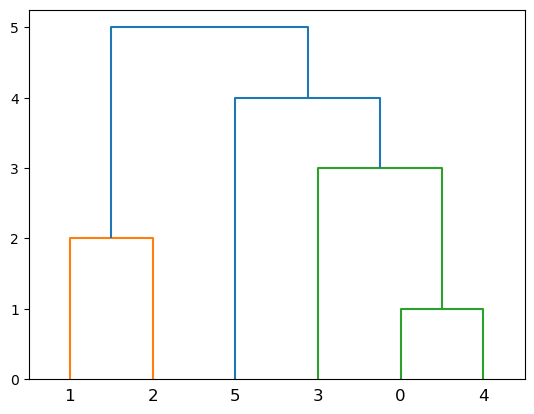

In [37]:
print("3.2 Метод полной связи с метрикой SMC\n")
clusters_2 = {'0':{0:[None,0,0,0,0,0]},
              '1':{1:[0,None,0,0,0,0]},
              '2':{2:[0,0,None,0,0,0]},
              '3':{3:[0,0,0,None,0,0]},
              '4':{4:[0,0,0,0,None,0]},
              '5':{5:[0,0,0,0,0,None]}}

distributor(clusters_2,SMC,get_max)
plt.figure()
dn2 = hierarchy.dendrogram(Z2)
# Матрица Z с полученными параметрами
# Далее они были заменены на номер уровня для демонстрации
# Матрица Z может быть также такой, так как после мержа [0,4] и [1,2] от 3 до кластеров равное расстояние
# [[0., 4., 1., 2.],
# [1., 2., 2., 2.], 
# [3., 7., 3., 3.],
# [5., 8., 4., 4.],
# [6., 9., 5., 6.]] 
# оба варианта верны


3.3 Метод средней связи с метрикой JC
Объединяем кластеры:  0 4
Вывод кластеров [[0, 4], [1], [2], [3], [5]]

Объединяем кластеры:  2 3
Вывод кластеров [[0, 4], [1], [2, 3], [5]]

Объединяем кластеры:  0 2
Вывод кластеров [[0, 2, 3, 4], [1], [5]]

Объединяем кластеры:  0 5
Вывод кластеров [[0, 2, 3, 4, 5], [1]]

Объединяем кластеры:  0 1
Вывод кластеров [[0, 1, 2, 3, 4, 5]]



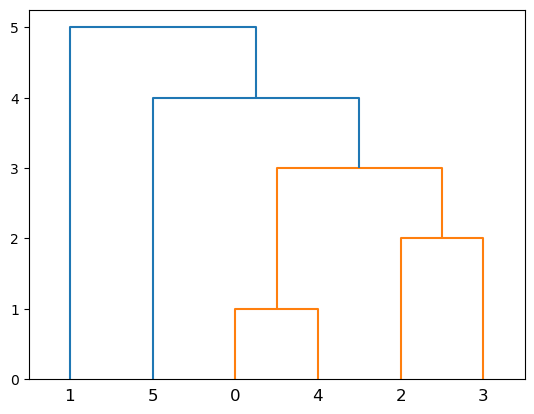

In [38]:
print("3.3 Метод средней связи с метрикой JC")
clusters_3 = {'0':{0:[None,0,0,0,0,0]},
              '1':{1:[0,None,0,0,0,0]},
              '2':{2:[0,0,None,0,0,0]},
              '3':{3:[0,0,0,None,0,0]},
              '4':{4:[0,0,0,0,None,0]},
              '5':{5:[0,0,0,0,0,None]}}
distributor(clusters_3,JC,get_mean)
plt.figure()
dn3 = hierarchy.dendrogram(Z3)  

## Задание 4

*Максимальная оценка задания: **2** балла*

Дан рисунок:

![plot](n5_4_1.png)

Даны следующие метрики:

- Метрика **1**
$$
L_{N}({\bf x},{\bf y})= \sqrt{\sum_{i=1}^n{(x_i-y_i)^2}}
$$
- Метрика **2**
$$
L_{\frac{1}{2}}({\bf x},{\bf y})= (\sum_{i=1}^n{\sqrt {|x_i-y_i|}})^2
$$
- Метрика **3**
$$
L_{max}({\bf x},{\bf y})= \max_{i=1}^n\{{|x_i-y_i|}\}
$$
- Метрика **4**
$$
L_{min}({\bf x},{\bf y})= \min_{i=1}^n\{{|x_i-y_i|}\}
$$
- Метрика **5**
$$
L_{pow}({\bf x},{\bf y})= \sqrt{\sum_{i=1}^n2^{i-1}(x_i-y_i)^2}
$$

*Самостоятельно* реализуйте алгоритм **DBSCAN**. В качестве результата выведите список кластеров **C**, базовых точек **O**, граничных точек **B**, выпавших точек (шумов) **N**. Постройте диаграмму рассеяния, на которой будут отображены все точки, отображена их принадлежность кластеру, а также выпавшие точки (вид диаграммы аналогичен диаграмме из задания 1.2)

Выполните кластеризацию и построение диаграмм для следующих параметров алгоритма:

4.1 Метрика **1**, ϵ = **4**, minPts = **2**

4.2 Метрика **2**, ϵ = **4**, minPts = **4**

4.3 Метрика **3**, ϵ = **2**, minPts = **5**

4.4 Метрика **4**, ϵ = **1**, minPts = **4**

4.5 Метрика **5**, ϵ = **3**, minPts = **5**

## Для справки

1. Машинное обучение. Учебное пособие. Темы: 
   - Глава 8. Репрезентативная кластеризация. Алгоритм K-средних. Алгоритм 8.1
   - Глава 8. Оценка максимального правдоподобия. Оценка среднего значения.
   - Глава 9. Иерархическая кластеризация. Агломеративная иерархическая кластеризация. Алгоритм 9.1
   - Глава 10. Кластеризация, основанная на плотности. Алгоритм DBSCAN. Алгоритм 10.1
2. [Sklearn KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

3. [Scipy Dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)


Основной код:
4.1 Метрика 1, ϵ = 4, minPts = 2

Кластеры [[0, 6, 7, 12, 13, 14, 19, 20], [1, 2, 3, 4, 5, 8, 11, 17, 21, 22, 23, 24], [9, 15, 18]]
Базовые точки [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 17, 18, 20, 21, 22, 23, 24]
Шумы [10, 16]
Граничные точки [7, 19]


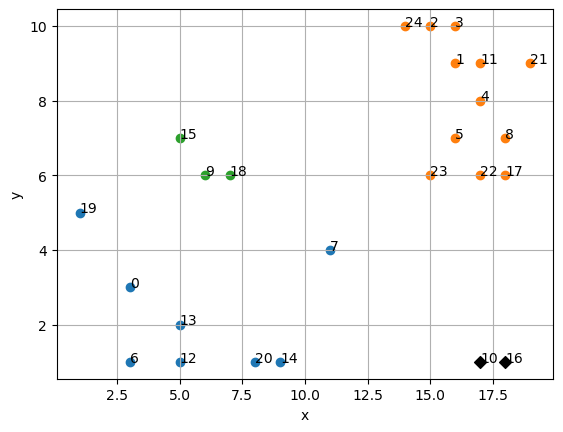

In [12]:
print("Основной код:")

# Функция связи плотности
# Принимает параметры:
# core - list() базовых точек
# num_core - передаваемое число для которого смотрим пары
# list_eps - list()() для эпсилон id значений
# list_id - id базовых точек
def density_connected(core, num_core, list_eps, list_id, k):
    for y in list_eps[num_core]:
        if list_id[y] != 0:
            continue
        list_id[y] = k
        if y in core:
            density_connected(core, y, list_eps, list_id, k)

# Функция метрики 1
# Принимает параметры:
# x - координаты первой точки
# y - координаты второй точки
# return:
# float - расстояние от точки до точки 
def metric_f(x, y):
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) ** (1/2)

# Функция метрики 1
# Принимает параметры:
# x - координаты первой точки
# y - координаты второй точки
# return:
# float - расстояние от точки до точки   
def metric_s(x, y):
    return ((abs(x[0] - y[0]) ** (1/2)) + (abs(x[1] - y[1]) ** (1/2))) ** (2)

# Функция метрики 2
# Принимает параметры:
# x - координаты первой точки
# y - координаты второй точки
# return:
# float - расстояние от точки до точки 
def metric_t(x, y):
    return max(abs(x[0] - y[0]), abs(x[1] - y[1]))

# Функция метрики 3
# Принимает параметры:
# x - координаты первой точки
# y - координаты второй точки
# return:
# float - расстояние от точки до точки 
def metric_four(x, y):
    return min(abs(x[0] - y[0]), abs(x[1] - y[1]))

# Функция метрики 4
# Принимает параметры:
# x - координаты первой точки
# y - координаты второй точки
# return:
# float - расстояние от точки до точки 
def metric_fif(x, y):
    return (1 * (x[0] - y[0]) ** 2 + 2 * (x[1] - y[1]) ** 2) ** (1/2)


# Функция алгоритма DBSCAN
# Принимает параметры:
# points - list()() входные 2-мерные данные
# metric - принимает тип метрики: metric_f, metric_s, metric_t, metric_four, metric_fif
# eps - окрестность точки
# min_points - количество точек в окрестности, чтобы данная точка стала базовой
# return:
# list()() для C - список со всеми кластерами
# list() для core - список базовых точек
# list() для boundary - список граничных точек
# list() для noise - список 
def DBSCAN(points, metric, eps, min_points):
    core = [] # list для базовых точек
    list_eps = [[] for i in range(len(points))]
    list_id = [0] * len(points)
    for i_ind, point in enumerate(points):
        for j_ind, e_points in enumerate(points):
            if (point != e_points):
                if ((metric(point, e_points)) <= eps):
                    list_eps[i_ind].append(j_ind)
        if (len(list_eps[i_ind]) >= min_points):
            core.append(i_ind)
    k = 0
    for x_core in core:
        if list_id[x_core] == 0:
            k += 1
            list_id[x_core] = k
            density_connected(core, x_core, list_eps, list_id, k)

    C=[[ind for ind,val in enumerate(list_id) if val==i] for i in range(1,k+1)] #ВЫВОД КЛАСТЕРОВ
    noise = [ind for ind,val in enumerate(list_id) if val==0]
    boundary = [un for un in range(len(points)) if core.count(un)<1 and noise.count(un)<1]

    return C, core, boundary, noise



if __name__ == '__main__':
    points = [(3, 3), (16, 9), (15, 10), (16, 10), (17, 8), (16, 7), (3, 1), (11, 4), (18, 7), (6, 6),
              (17, 1), (17, 9), (5, 1), (5, 2), (9, 1), (5, 7), (18, 1), (18, 6), (7, 6), (1, 5),
              (8, 1), (19, 9), (17, 6), (15, 6), (14, 10)]
    
    print("4.1 Метрика 1, ϵ = 4, minPts = 2\n")

    C,core,boundary,noise = DBSCAN(points, metric_f, 4, 2)
    # ВАРИАНТЫ метрик:
    # 1 - metric_f СЕЙЧАС
    # 2 - metric_s
    # 3 - metric_t
    # 4 - metric_four
    # 5 - metric_fif 
    
    print("Кластеры", C)
    print("Базовые точки", core)
    print("Шумы", noise)
    print("Граничные точки", boundary)
    x_l_noise =[]
    y_l_noise =[]
    for val in C:
        x_l = [points[ind][0] for ind in val]
        y_l = [points[ind][1] for ind in val]
        plt.scatter(x_l,y_l)
    for i in noise:
        x_l_noise.append(points[i][0])
        y_l_noise.append(points[i][1])
    plt.scatter(x_l_noise,y_l_noise,c='black',marker='D')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    ver = 0
    for x,y in points:
        plt.text(x,y,ver)
        ver+=1

4.2 Метрика 2, ϵ = 4, minPts = 4

Кластеры [[1, 2, 3, 4, 5, 8, 11, 17, 21, 22, 23, 24], [6, 12, 13, 14, 20]]
Базовые точки [1, 2, 3, 4, 5, 8, 11, 12, 22, 23]
Шумы [0, 7, 9, 10, 15, 16, 18, 19]
Граничные точки [6, 13, 14, 17, 20, 21, 24]


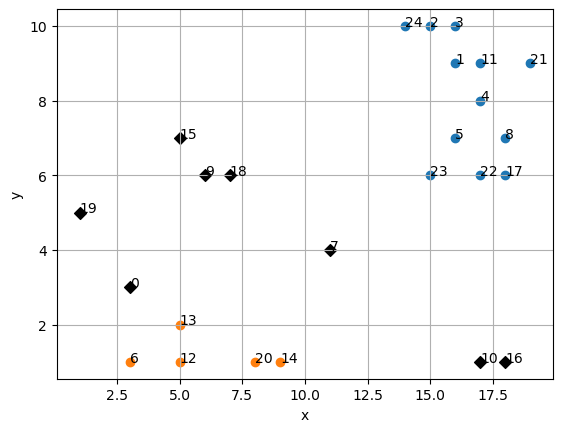

In [13]:
    print("4.2 Метрика 2, ϵ = 4, minPts = 4\n")
    C,core,boundary,noise = DBSCAN(points, metric_s, 4, 4)
    # ВАРИАНТЫ метрик:
    # 1 - metric_f 
    # 2 - metric_s СЕЙЧАС
    # 3 - metric_t
    # 4 - metric_four
    # 5 - metric_fif 
    
    print("Кластеры", C)
    print("Базовые точки", core)
    print("Шумы", noise)
    print("Граничные точки", boundary)
    x_l_noise =[]
    y_l_noise =[]
    for val in C:
        x_l = [points[ind][0] for ind in val]
        y_l = [points[ind][1] for ind in val]
        plt.scatter(x_l,y_l)
    for i in noise:
        x_l_noise.append(points[i][0])
        y_l_noise.append(points[i][1])
    plt.scatter(x_l_noise,y_l_noise,c='black',marker='D')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    ver = 0
    for x,y in points:
        plt.text(x,y,ver)
        ver+=1

4.3 Метрика 3, ϵ = 2, minPts = 5

Кластеры [[1, 2, 3, 4, 5, 8, 11, 17, 21, 22, 23, 24]]
Базовые точки [1, 2, 3, 4, 5, 8, 11, 22]
Шумы [0, 6, 7, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20]
Граничные точки [17, 21, 23, 24]


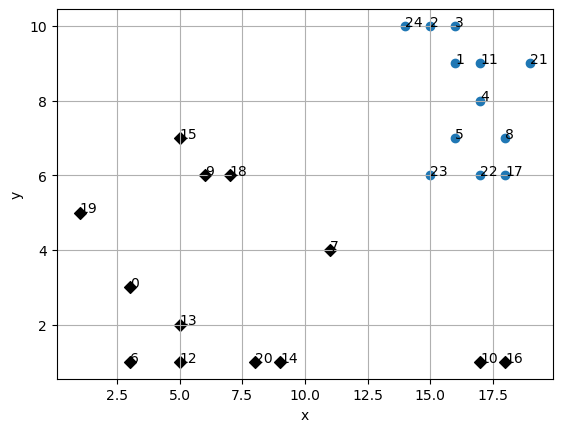

In [14]:
    print("4.3 Метрика 3, ϵ = 2, minPts = 5\n")

    C,core,boundary,noise = DBSCAN(points, metric_t, 2, 5)
    # ВАРИАНТЫ метрик:
    # 1 - metric_f 
    # 2 - metric_s
    # 3 - metric_t СЕЙЧАС
    # 4 - metric_four
    # 5 - metric_fif 
    
    print("Кластеры", C)
    print("Базовые точки", core)
    print("Шумы", noise)
    print("Граничные точки", boundary)
    x_l_noise =[]
    y_l_noise =[]
    for val in C:
        x_l = [points[ind][0] for ind in val]
        y_l = [points[ind][1] for ind in val]
        plt.scatter(x_l,y_l)
    for i in noise:
        x_l_noise.append(points[i][0])
        y_l_noise.append(points[i][1])
    plt.scatter(x_l_noise,y_l_noise,c='black',marker='D')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    ver = 0
    for x,y in points:
        plt.text(x,y,ver)
        ver+=1

4.4 Метрика 4, ϵ = 1, minPts = 4

Кластеры [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
Базовые точки [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Шумы []
Граничные точки [0, 7]


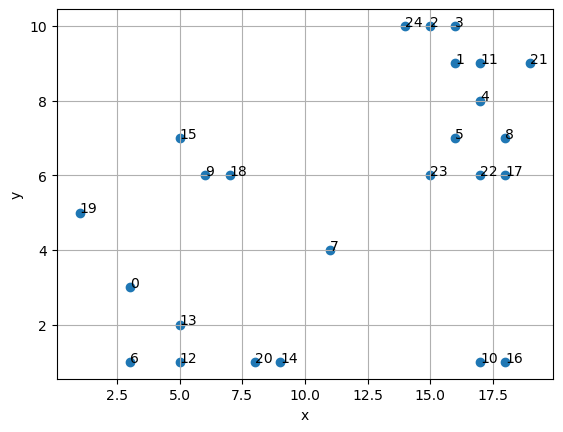

In [15]:
    print("4.4 Метрика 4, ϵ = 1, minPts = 4\n")
    C,core,boundary,noise = DBSCAN(points, metric_four, 1, 4)
    # ВАРИАНТЫ метрик:
    # 1 - metric_f 
    # 2 - metric_s
    # 3 - metric_t
    # 4 - metric_four СЕЙЧАС
    # 5 - metric_fif 
    
    print("Кластеры", C)
    print("Базовые точки", core)
    print("Шумы", noise)
    print("Граничные точки", boundary)
    x_l_noise =[]
    y_l_noise =[]
    for val in C:
        x_l = [points[ind][0] for ind in val]
        y_l = [points[ind][1] for ind in val]
        plt.scatter(x_l,y_l)
    for i in noise:
        x_l_noise.append(points[i][0])
        y_l_noise.append(points[i][1])
    plt.scatter(x_l_noise,y_l_noise,c='black',marker='D')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    ver = 0
    for x,y in points:
        plt.text(x,y,ver)
        ver+=1

4.5 Метрика 5, ϵ = 3, minPts = 5

Кластеры [[1, 2, 3, 4, 5, 8, 11, 17, 21, 22, 23, 24]]
Базовые точки [1, 3, 4, 5, 8, 11, 17, 22]
Шумы [0, 6, 7, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20]
Граничные точки [2, 21, 23, 24]


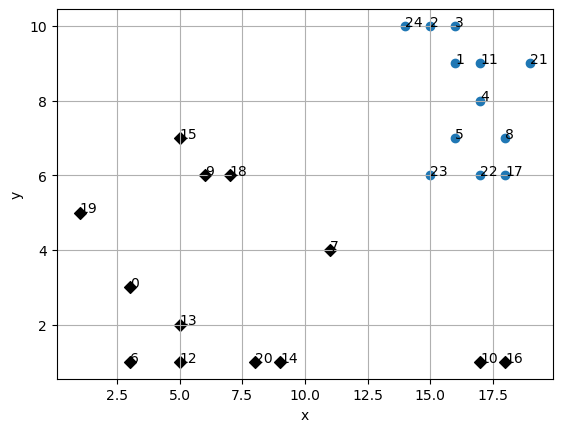

In [16]:
    print("4.5 Метрика 5, ϵ = 3, minPts = 5\n")
    C,core,boundary,noise = DBSCAN(points, metric_fif, 3, 5)
    # ВАРИАНТЫ метрик:
    # 1 - metric_f 
    # 2 - metric_s
    # 3 - metric_t
    # 4 - metric_four
    # 5 - metric_fif СЕЙЧАС
    
    print("Кластеры", C)
    print("Базовые точки", core)
    print("Шумы", noise)
    print("Граничные точки", boundary)
    x_l_noise =[]
    y_l_noise =[]
    for val in C:
        x_l = [points[ind][0] for ind in val]
        y_l = [points[ind][1] for ind in val]
        plt.scatter(x_l,y_l)
    for i in noise:
        x_l_noise.append(points[i][0])
        y_l_noise.append(points[i][1])
    plt.scatter(x_l_noise,y_l_noise,c='black',marker='D')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    ver = 0
    for x,y in points:
        plt.text(x,y,ver)
        ver+=1